### Prep:

* Resample all inputs see 1-Resample Input Data.ipynb
* Rasterize fires and organize by time period see 2-RasterizeFirePolygons_OrganizeData.ipynb

### Data Structure:
Data should be structured as follows:

* Independent Vars 2012-2016
    * aet
        * aet-201201.tif
        * ...
        * aet-201612.tif
    * cwd
        * cwd-201201.tif
        * ...
        * cwd-201612.tif
    * ppt
        * ppt-201201.tif
        * ...
        * ppt-201612.tif
    * ...
* Independent Vars 2017-2021
    * ...
* Dependent Var 2012-2016
    * Fire-2012-2016
* Dependent Var 2017-2021
    * Fire-2017-2021

In [1]:
import tsraster.prep  as tr
import tsraster.calculate  as ca

import tsraster.model  as md
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
from math import ceil
from tsraster.prep import set_df_mindex

### Extract time series features

The following extracts time series properties for multiple variables in a given time period. Here we extract mean and maximum values for aet, cwd, pck, and tmx for a three month period from 201201 to 201203.

In [2]:
path = "C:/Users/Python3/Documents/wildfire_FRAP/Data/Examples/12Month_Test/"

In [3]:
import glob
baseYear = 2012
offset = 1
length = 3
images = []
for x in range(length):
    images = images +  glob.glob((path+ '/*/*-' + str(baseYear - x + offset) + '??.tif'), recursive=True)
print(images)



['C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201301.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201302.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201303.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201304.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201305.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201306.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201307.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201308.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201309.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201310.tif', 'C:/Users/Python3/Documents/wildfire_FRAP/Data/BCM HIST Final 1000m\\aet\\aet-201311.tif'

In [4]:
###########################

In [5]:
parameters = {
    "mean": None,
    "maximum": None}

extracted_features = ca.calculateFeatures_window(path = "C:/Users/Python3/Documents/wildfire_FRAP/Data/Examples/12Month_Test/", 
                                          parameters = {"mean": None,
                                                        "maximum": None}, 
                                          baseYear = 2010,
                                          length = 2,
                                          offset = 0,
                                          reset_df=True,
                                          raster_mask =  "C:/Users/Python3/Documents/wildfire_FRAP/Data/Examples/buffer/StatePoly_buf.tif" ,
                                          tiff_output=True,
                                          workers = 1)


df: C:/Users/Python3/Documents/wildfire_FRAP/Data/Examples/3month_ts/my_df.csv


Feature Extraction: 100%|████████████████████████| 5/5 [02:14<00:00, 27.68s/it]


features:C:\Users\Python3\Documents\wildfire_FRAP\Data\Examples\3month_ts_features\extracted_features.csv
tif:C:\Users\Python3\Documents\wildfire_FRAP\Data\Examples\3month_ts_features\extracted_features2013_2_prev_offset0.tiff


In [6]:
extracted_features.head(3)

,,aet__maximum,aet__mean,cwd__maximum,cwd__mean,pck__maximum,pck__mean,tmx__maximum,tmx__mean
pixel_id,time,,,,,,,,
0,201201_201203,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
1,201201_201203,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0
2,201201_201203,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0,-9999.0


In [7]:
extracted_features.describe()

,aet__maximum,aet__mean,cwd__maximum,cwd__mean,pck__maximum,pck__mean,tmx__maximum,tmx__mean
count,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06,1.137669e+06
mean,-6.382700e+03,-6.386605e+03,-6.369465e+03,-6.374652e+03,-6.379492e+03,-6.384438e+03,-6.384961e+03,-6.385424e+03
std,4.812777e+03,4.807575e+03,4.830416e+03,4.823498e+03,4.817396e+03,4.810582e+03,4.809762e+03,4.809146e+03
min,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03
25%,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03
50%,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03,-9.999000e+03
75%,1.145550e+01,6.776667e+00,3.689320e+01,2.881560e+01,0.000000e+00,0.000000e+00,1.352320e+01,1.259320e+01
max,8.453000e+01,4.696333e+01,1.165520e+02,8.743884e+01,3.777226e+03,3.452004e+03,2.756720e+01,2.514717e+01


(1209, 941, 8)


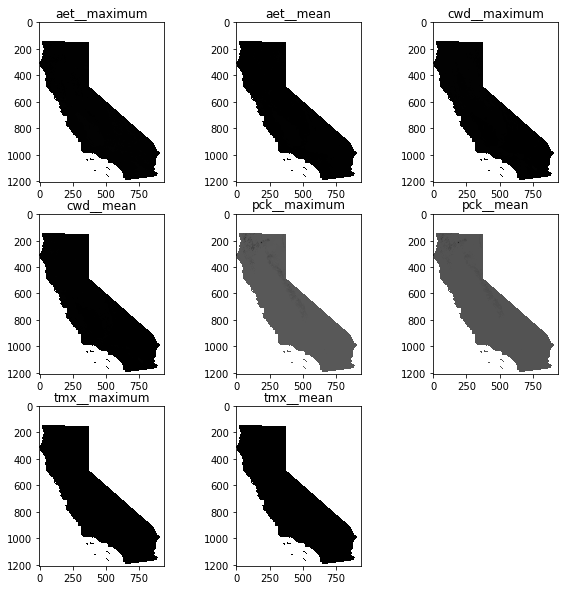

In [8]:
# first, get the original dimension/shape of image 
og_rasters = tr.image_to_array(r"../Data/Examples/12Month_Test/")
rows, cols, nums = og_rasters.shape


# convert df to matrix array
matrix_features = extracted_features.values
num_of_layers = matrix_features.shape[1]


f2Array = matrix_features.reshape(rows, cols, num_of_layers)
print(f2Array.shape)

plt.subplots(1, 1,figsize=(10,10))
cols = 3

for i in range(0,f2Array.shape[2]):
    img = f2Array[:,:,i]
    i = i+1
    plt.subplot(ceil(f2Array.shape[2]/cols),cols,i)
    plt.imshow(img, cmap="Greys")
    plt.title(extracted_features.columns[i-1])

## Feature Selection
Because the number of features can be very large, we need to limit it to those most relevant.


In [9]:
#%% read target data
target_variable = r"../Data/Examples/3month_fire/fire_2010.tif"

target_data = tr.image_to_series_simple(target_variable)
target_data.head()

pixel_id
0    0
1    0
2    0
3    0
4    0
Name: value, dtype: int8

 Remove pixels outside of the state or with missing values. 

In [10]:
raster_mask = r"../Data\Examples\buffer\StatePoly_buf.tif"

# combine in list to make sure they return same number of rows
mask_list = [target_data, extracted_features]

target_data_mask, extracted_features_mask  = tr.mask_df(raster_mask,
                                   original_df=mask_list,
                                   reset_index = False)
 

time index missing in one element, merging list elements using only pixel_id index


In [11]:
target_data_mask.head()


,,value
pixel_id,time,
134588,201201_201203,0
134589,201201_201203,0
134590,201201_201203,0
134591,201201_201203,0
134592,201201_201203,0


In [12]:
extracted_features_mask.head()

,,aet__maximum,aet__mean,cwd__maximum,cwd__mean,pck__maximum,pck__mean,tmx__maximum,tmx__mean
pixel_id,time,,,,,,,,
134588,201201_201203,30.005455,15.473637,24.794546,18.123335,0.0,0.0,12.360000,11.565715
134589,201201_201203,25.833000,13.179166,27.972000,19.629168,0.0,0.0,12.223500,11.485499
134590,201201_201203,29.665501,15.439834,23.674500,16.840166,0.0,0.0,12.247000,11.600833
134591,201201_201203,33.670799,17.440399,20.777201,15.756932,0.0,0.0,12.165600,11.582133
134592,201201_201203,39.907600,20.202133,17.719200,14.060533,0.0,0.0,11.927999,11.432799


In [13]:
obj = [target_data_mask,extracted_features_mask]

X_train, X_test, y_train, y_test = md.get_data(obj,
                                            stratify=True,
                                            test_size=0.9,
                                            scale=False  )

input should be csv or pandas dataframe with yX, or [y,X]
reading in list concat on common index, inner join


fdr_level is the level statistics significance 

In [14]:
relevance_test, relevant_features  = ca.checkRelevance2(x=X_train, 
                                                        y=y_train,
                                                        fdr_level=0.01)
print(relevance_test)
relevant_features.head()

                   feature  type   p_value  relevant
feature                                             
pck__mean        pck__mean  real  0.000617      True
pck__maximum  pck__maximum  real  0.000638      True
aet__mean        aet__mean  real  0.041441     False
cwd__mean        cwd__mean  real  0.047057     False
cwd__maximum  cwd__maximum  real  0.085511     False
aet__maximum  aet__maximum  real  0.258564     False
tmx__mean        tmx__mean  real  0.613272     False
tmx__maximum  tmx__maximum  real  0.785129     False


,,pck__mean,pck__maximum
pixel_id,time,,
713809,201201_201203,152.679062,185.123199
318371,201201_201203,39.726166,81.434998
716626,201201_201203,97.715858,119.011200
837798,201201_201203,0.000000,0.000000
975562,201201_201203,0.000000,0.000000


### Train model and make prediction

In [15]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1,
                                 max_depth=2, random_state=0).fit(X_train[relevant_features.columns], y_train)

In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix, cohen_kappa_score
predict_test = clf.predict(X=X_test[relevant_features.columns])

test_acc = accuracy_score(y_test, predict_test)
kappa = cohen_kappa_score(y_test, predict_test)
confusion = confusion_matrix(y_test, predict_test)

print('Testing accuracy:',test_acc)
print('Testing Kappa: ',kappa)
print('Testing Conf: ')
print(confusion)

Testing accuracy: 0.997899773738511
Testing Kappa:  -0.0004956424638768997
Testing Conf: 
[[368708    106]
 [   670      0]]


In [17]:
feature_importances = pd.DataFrame(clf.feature_importances_,
                                   index = relevant_features.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
 
feature_importances

,importance
pck__mean,0.717692
pck__maximum,0.282308


### Predict to all cells and map
predict to all observations in panel
get predicted class and probability of class

In [18]:
all_predict = md.model_predict(model = clf,
                                        new_X = extracted_features[relevant_features.columns])

# returns probability of each class
all_prob =  md.model_predict_prob(model = clf,
                                        new_X = extracted_features[relevant_features.columns])

In [19]:
print(all_predict.head())
all_prob.head()

pixel_id
0    0
1    0
2    0
3    0
4    0
dtype: int8


,0,1
pixel_id,,
0,0.997798,0.002202
1,0.997798,0.002202
2,0.997798,0.002202
3,0.997798,0.002202
4,0.997798,0.002202


Rasterize and plot prediction

C:\Users\Python3\Anaconda3\envs\ts-raster\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


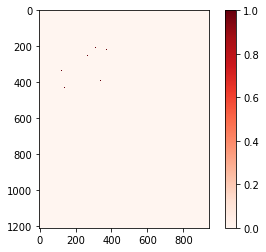

In [20]:
import rasterio
from numpy import reshape
raster_ex = "../Data/Examples/3month/aet-198401.tif"
ex_row, ex_cols =  rasterio.open(raster_ex).shape

f2Array = reshape(all_prob[1].as_matrix(), (ex_row, ex_cols))
 # Plot the grid

plt.imshow(f2Array)
plt.set_cmap("Reds")
plt.colorbar( )
plt.show()

In [21]:
q = md.ElasticNetModel(X_train, y_train, X_test, y_test)
print(q)

(ElasticNet(alpha=0.5, copy_X=True, fit_intercept=True, l1_ratio=0.7,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False), 'MSE = -6.43418462953349e-08', 'R-Squared = -2.4059712607792952e+33')


In [22]:
q = md.ElasticNetCVModel(X_train, y_train, X_test, y_test)
print(q)

(ElasticNetCV(alphas=None, copy_X=True, cv=5, eps=0.001, fit_intercept=True,
       l1_ratio=[0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.975, 0.99],
       max_iter=1000, n_alphas=50, n_jobs=None, normalize=False,
       positive=False, precompute='auto', random_state=None,
       selection='cyclic', tol=0.0001, verbose=0), 'MSE = 0.000905986504143419', 'R-Squared = -1025.8642490457548', None, [0.01, 0.025, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 0.975, 0.99])
